In [ ]:
##charge_comparison from https://github.com/Mishima-syk/psikit/blob/master/examples/CHARGE_COMPARISON/charge_comparison.ipynb

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit


In [3]:
pk = Psikit()



  Memory set to   3.725 GiB by Python driver.


In [4]:
#changed to caffeine smiles string

pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')


  Threads set to 4 by Python driver.


In [5]:
pk.optimize()


Optimizer: Optimization complete!


-676.3571129827342

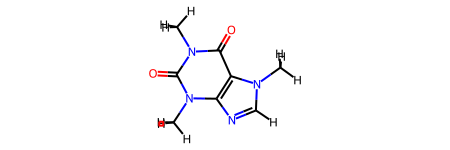

In [6]:
pk.mol


In [7]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20268931  0.07008206  0.084914   -0.47258453  0.13010661 -0.10235996
  0.36415471 -0.49590313 -0.04540132  0.36081471 -0.52781675  0.02642959
 -0.00207298 -0.03500159  0.11087175  0.11087175  0.11087175  0.17333582
  0.05192522  0.05192522  0.05192522  0.06186706  0.06186706  0.06186706]
[-0.11403642 -0.69387038  0.38632883 -0.62275553  0.63493758  0.09329988
  0.89981609 -0.63013645 -0.87901485  1.09566322 -0.62726385 -0.87751733
 -0.1204627  -0.12346645  0.12973151  0.16734419  0.16720519  0.18240564
  0.16736606  0.15101215  0.1470227   0.14569664  0.14553714  0.17515713]
[-0.1320951  -0.05232216  0.07731977 -0.27538195  0.13956686 -0.12548909
  0.29396683 -0.39449916 -0.18832075  0.34854689 -0.39861452 -0.15254682
 -0.13211092 -0.13820967  0.10404574  0.11679862  0.11774684  0.12133386
  0.11933932  0.10950067  0.1066767   0.10713191  0.10592672  0.12168941]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)


In [11]:
df.round(3)


,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.203,-0.114,-0.132
1,N,0.070,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.473,-0.623,-0.275
4,C,0.130,0.635,0.140
5,C,-0.102,0.093,-0.125
6,C,0.364,0.900,0.294
7,O,-0.496,-0.630,-0.394
8,N,-0.045,-0.879,-0.188
9,C,0.361,1.096,0.349


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')


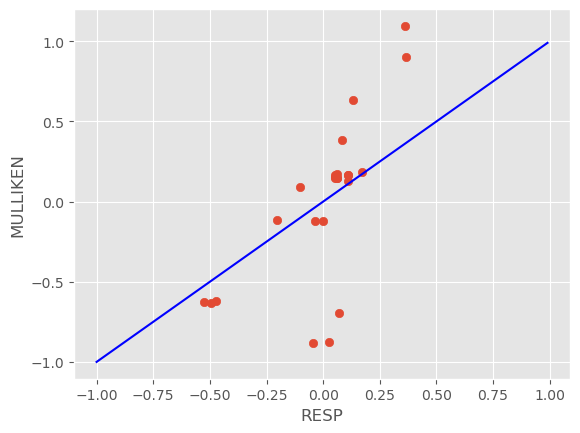

In [14]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')


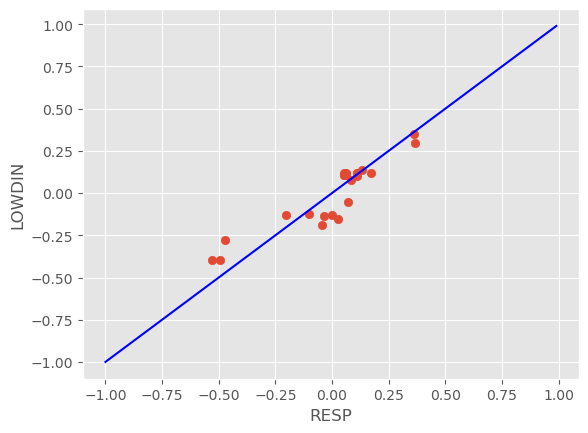

In [15]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')


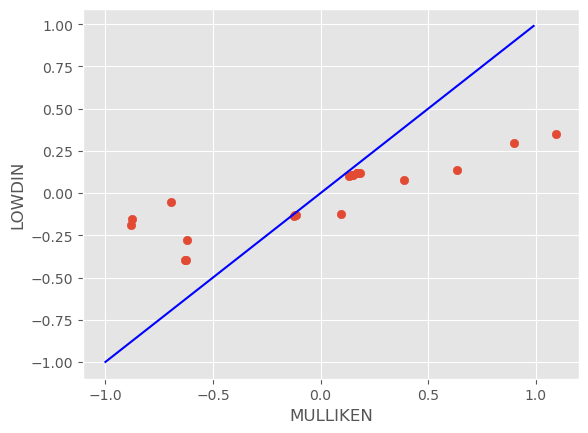

In [16]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')
